In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
r=1
mean=[15,5]
cov=[[1,r],[r,1]]
x,y=x,y=np.random.multivariate_normal(mean,cov,400).T

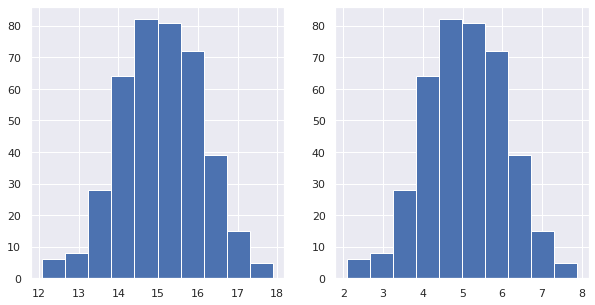

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) #un renlon, dos columnas, posicion 1
plt.hist(x=x, bins=10) #bins es cuantas filas quieres usar
plt.subplot(1,2,2)
plt.hist(x=y,
       bins=10)

plt.show()

Text(0.5, 1.0, 'Marginal distributions of y')

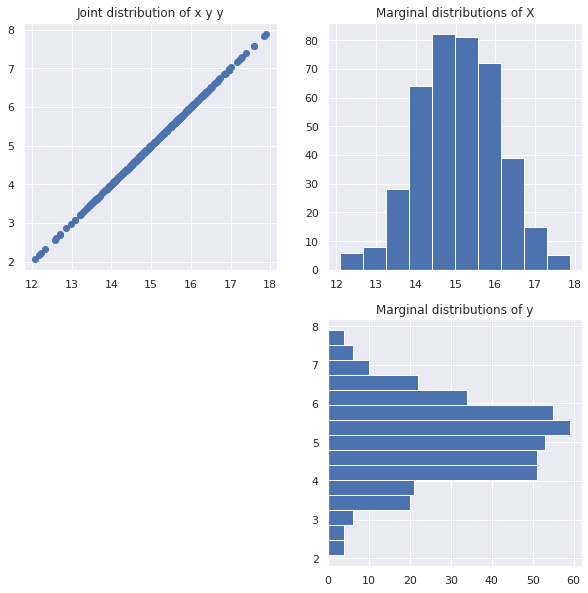

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=x,
           y=y)
plt.title("Joint distribution of x y y")

plt.subplot(222)
plt.hist(x=x,
       bins=10)
plt.title("Marginal distributions of X")

plt.subplot(224)
plt.hist(x=y,
         orientation="horizontal",
         bins=15)
plt.title("Marginal distributions of y")


In [18]:
import pandas as pd
pd.set_option("max_columns", None,"max_rows",None)
import re

In [19]:
df=pd.read_csv("datasets/pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


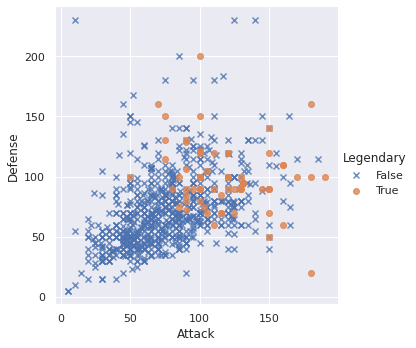

In [21]:
sns.lmplot(x="Attack",
          y="Defense",
           hue="Legendary",
          markers=["x","o"],
          fit_reg=False,
          data=df)
plt.show()

In [23]:
df=pd.read_csv("datasets/nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [24]:
keep_test=["BMXWT","BMXHT", "BMXBMI","BMXLEG","BMXARML","BMXARMC","BMXWAIST"]
keep_test

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [25]:
col_names=df.columns
col_names

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [28]:
keep=[column for column in col_names if "BMX" in column]
keep

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [29]:
df_BMX=df[keep]
df_BMX

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4
5,64.4,150.0,28.6,34.4,33.5,31.4,92.9
6,76.6,165.4,28.0,38.8,38.0,34.0,86.6
7,64.5,151.3,28.2,34.1,33.1,31.5,93.3
8,72.4,166.1,26.2,NaN,NaN,NaN,NaN
9,108.3,179.4,33.6,46.0,44.1,38.5,116.0
